# Regression Analysis for Cellulose Dissolution

**References for this data:**

[1] Ella Gale, Remigius H. Wirawan, Rodrigo L. Silveira, Caroline S. Pereira, Marcus A. Johns, Munir S. Skaf and Janet L. Scott, "Directed Discovery of Greener Cosolvents: New Cosolvents for Use in Ionic Liquid Based Organic Electrolyte Solutions for Cellulose Dissolution," *ACS Sustainable Chem. Eng.*, 2016, **4**, 11, 6200--6207
Publication Date:September 28, 2016
https://doi.org/10.1021/acssuschemeng.6b02020

[2] Gale, E. M., Johns, M. A., Wirawan, R. H., & Scott, J. L. (2017). "Combining random walk and regression models to understand solvation in multi-component solvent systems." *Physical Chemistry Chemical Physics*, **19**(27), 17805-17815. https://doi.org/10.1039/c7cp02873c

Cellulose is made of repeating units of cellubiose (shown Fig. 1 left), it's very hard to dissolve (recalcitrant), afterall it is a main component of trees, and must be dissolved in **ionic liquids** (IL). These are organic salts that are in a liquid state at room temperature. The ionic liquid used in this work is 1-Ethyl-3-methylimidazolium acetate [EMim]$^+$[[OAc]$^-$, shown around the cellubiose repeat unit (Fig. 1 left). 

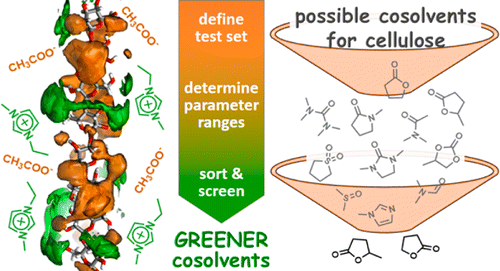

Fig. 1. Graphical abstract from paper 1. Left: a cellubiose residue surrounded by a [Emim][OAc] ionic liquid solvent shell; orange: location of [OAc]$^-$ ions; green location of [EMim]$^+$ ions. Right: the 11 co-solvents that were investigated in this work, and the 2 new ones that were identified.

**The chemical problem:** Cellulose is a readily available material that can be used to make useful biodegradable materials from waste materials (like bagasse, the husks of sugar cane left over after processing). However, the first stage of processing is to dissolve cellulose which is very challenging. Currently, liquid salts called *ionic liquids* (IL) are used to do this (which are nice solvents in terms of green chemistry as they have no vapour pressure so can be recovered, but they are horrible solvents to handle). Ionic liquids are expensive, and the resulting cellubiose-ionic liquid mixture is very thick and hard to process. The solution to both these problems is to dilute the ionic liquid with a *co-solvent* (CS), and the mixture of ionic liquid and co solvent is called an *organic electrolyte solution* (OES). 

This notebook will run through some data analysis of the data obtained in the relevant papers to determine which CSs are ideal for cellulose dissolution. 

**Materials**
1-Ethyl-3-methylimidazolium acetate (>95% purity, Sigma-Aldrich) and microcrystalline cellulose (Sigma-Aldrich, 20 μm particle size) were dried at 80 °C under reduced pressure to constant mass. Dipolar aprotic solvents (all >99% purity, Sigma-Aldrich) were used as received, except for sulfolane, which was dried over activated 3 Å molecular sieves. The water content of the ionic liquid and solvents was measured by Karl Fisher titration and found to be: [EMIm][OAc] 1.1%; 1-methylimidazole 0.2%; dimethyl sulfoxide 1.1%; N,N-dimethylformamide 0.3%; N,N′-dimethylimidazolidinone 0.7%; N,N-dimethylacetamide 0.4%; sulfolane 0.1%; propylene carbonate 0.1%; γ-valerolactone 0.8%; N,N,N′,N′-tetramethylurea 0.3%; N-methylpyrrolidinone 0.8%; and γ-butyrolactone 0.3%.

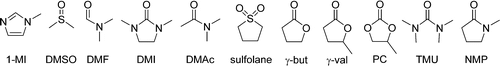

Fig. 2. Co-solvents (CS) used in organic electrolyte solutions (OES).

**Solubility Tests**
Solubility tests were conducted at 70 °C. As the cellulose solutions formed are viscous and not amenable to filtration, solubility was determined by addition of small aliquots of dried microcrystalline cellulose (MC) to mixtures of [EMIm][OAc]/cosolvent of appropriate composition. The maximum amount of MC that dissolved, a, and minimum amount that did not dissolve, b, were recorded, giving an under- and overestimate for the maximum amount of MC dissolvable, v. Repeated determinations, using smaller incremental added weights of MC then led to a narrow range between “soluble” and “insoluble”. (As MC tended to form aggregates when added directly to OESs, a slightly modified procedure was followed once approximate solubility values were known at any given OES composition: to a weighed quantity of dried MC was added a measured quantity of the selected cosolvent; after stirring for 1 min to wet and disperse the MC powder, calculated quantities of IL were added, and then, small, weighed aliquots were added until no further MC would dissolve.) Insoluble samples were maintained for a minimum of 16 h at 70 °C to confirm the lack of further dissolution.
Each pair of points (ai, bi) was given a weight, wi,:
(1)
based on, vi, the errors on ai and bi, as given by vi = (bi– ai)/2, such that the uncertainties on points ai and bi are ai+ vi and bi– vi respectively. Other sources of error are much smaller in comparison.

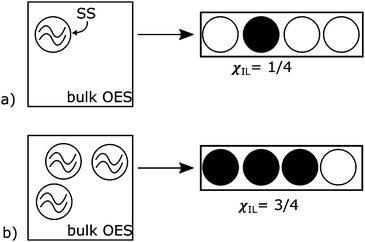

Fig 3. An explanation of mole fraction. Cellubiose is surrounded by a solvent shell (SS). There is only so much cellulose that can fit into the OES. We normalise this data such that the maximum amount of cellubiose that can be dissolved (in pure ionic liquid) is 1. Note that in this cartoon system only 4 units of cellubiose can be dissolved.

The mole fraction of ionic liquid in the OES mixture, $\chi_{IL}$, is calculated for each mixture ($\chi_{IL}=1$ is pure ionic liquid, $\chi_{IL}=0$ is pure co-sovlent. The weight percentage of dissolved cellulose was measured: very small amounts of nanocrystalling cellulose were weighed out and put into the OES to see if it dissolved. You'll notice that there appears to be over and under points, the lower values are the last measurement of cellulose that dissolved, the higher values are the first measurement that did not dissolve.

From the weight percentage, the mole fraction of the cellubiose repeat unit, $\chi_{cell}$ was calculated to get the plots below.[1]

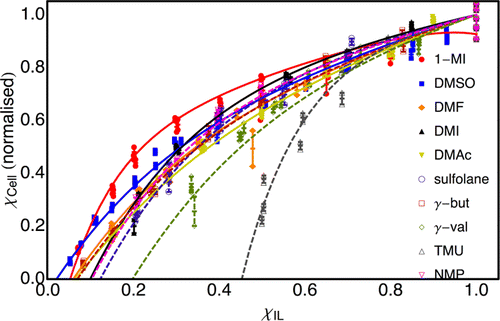

Fig. 4 Cellulose-OES dissolution curves.  

**Things to note:**

* Most the curves seem to have roughly the same sort of shape
* Some curves look a little different to the rest, look at the shape of 1-MI
* The point where these curves cross the x-axis is the molar fraction of solvent required before any of the cellulose will dissolve. An ionic liquid-DMSO OES only requires about 0.08 or 8% by mole of ionic liquid for some of the cellulose to be dissolved, whereas TMU requires ~0.48 (48% by mole) of ionic liquid before any cellulsoe will dissolve. *What is the cause of this difference?* 

# 1. Importing and visualising the data

In [112]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [113]:
SolventNameList = ["1MI", "DMSO", "DMF", "DMI", "DMAc", "sulfolane", "gbut", "gval", "TMU", "NMP", "PC"]

In [114]:
for i in range(len(SolventNameList)):
    my_string =  "chi" + SolventNameList[i] + " = pd.read_csv(\"./data/chichi" + SolventNameList[i] + ".csv\")"
    print(my_string)
    exec(my_string)

chi1MI = pd.read_csv("./data/chichi1MI.csv")
chiDMSO = pd.read_csv("./data/chichiDMSO.csv")
chiDMF = pd.read_csv("./data/chichiDMF.csv")
chiDMI = pd.read_csv("./data/chichiDMI.csv")
chiDMAc = pd.read_csv("./data/chichiDMAc.csv")
chisulfolane = pd.read_csv("./data/chichisulfolane.csv")
chigbut = pd.read_csv("./data/chichigbut.csv")
chigval = pd.read_csv("./data/chichigval.csv")
chiTMU = pd.read_csv("./data/chichiTMU.csv")
chiNMP = pd.read_csv("./data/chichiNMP.csv")
chiPC = pd.read_csv("./data/chichiPC.csv")


In [115]:
for i in range(len(SolventNameList)):
    my_string =  "c" + SolventNameList[i] + " = pd.DataFrame(chi" + SolventNameList[i] + ")"
    print(my_string)
    exec(my_string)

c1MI = pd.DataFrame(chi1MI)
cDMSO = pd.DataFrame(chiDMSO)
cDMF = pd.DataFrame(chiDMF)
cDMI = pd.DataFrame(chiDMI)
cDMAc = pd.DataFrame(chiDMAc)
csulfolane = pd.DataFrame(chisulfolane)
cgbut = pd.DataFrame(chigbut)
cgval = pd.DataFrame(chigval)
cTMU = pd.DataFrame(chiTMU)
cNMP = pd.DataFrame(chiNMP)
cPC = pd.DataFrame(chiPC)


<AxesSubplot:xlabel='chi_IL', ylabel='chi_cell'>

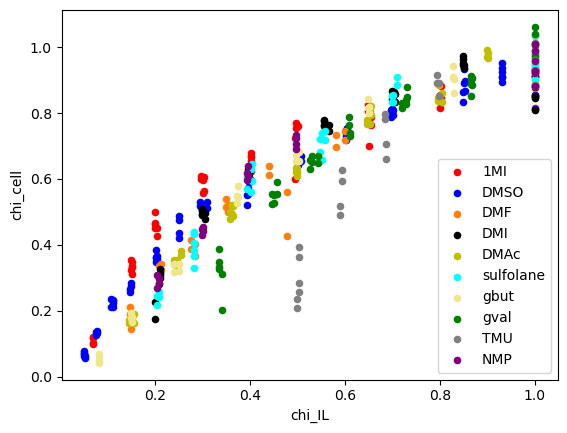

In [116]:
ax=chi1MI.plot.scatter("chi_IL","chi_cell", c='r', label='1MI')
chiDMSO.plot.scatter("chi_IL","chi_cell", c='b', ax=ax, label='DMSO')
chiDMF.plot.scatter("chi_IL","chi_cell", c='tab:orange', ax=ax, label='DMF')
chiDMI.plot.scatter("chi_IL","chi_cell", c='k', ax=ax, label='DMI')
chiDMAc.plot.scatter("chi_IL","chi_cell", c='y', ax=ax, label='DMAc')
chisulfolane.plot.scatter("chi_IL","chi_cell", c='cyan', ax=ax, label='sulfolane')
chigbut.plot.scatter("chi_IL","chi_cell", c='khaki', ax=ax, label='gbut')
chigval.plot.scatter("chi_IL","chi_cell", c='g', ax=ax, label='gval')
chiTMU.plot.scatter("chi_IL","chi_cell", c='gray', ax=ax, label='TMU')
chiNMP.plot.scatter("chi_IL","chi_cell", c='purple', ax=ax, label='NMP')

### 1.1 Efficiency data

There are a couple of limiting quantities found for these OESs.
* `min_chi_IL` is where the curves above cross the x-axis, i.e. the minimum amount of IL required to get any dissolution at all
* `max_efficiency_measure`: the greatest mass of of cellulose dissolved per unit mass of IL, i.e. the efficiency of the best OES mixture
* `chi_IL_max_efficiency` which is the $\chi_{IL}$ required in the best OES mixture for that co-solvent. This is the point where the largest amount of cellulose is being dissolved for the each mole IL (i.e. the point you'd want to run your processes at as you're getting the most for your money).

Here, scatter plots of these quantities are made to determine relationships between these variables:

In [117]:
# Limiting quantities for the OES curves (copied from table 1 in [1])
max_efficiency = np.array([0.168,0.160,0.284,0.333,0.349,0.399,0.318,0.609,0.752,0.344])
min_chi_IL = np.array([0.052, 0.019,0.058,0.096,0.056,0.115,0.065,0.184,0.451,0.100])
chi_IL_max_efficiency = np.array([0.168, 0.160,0.284,0.333,0.349,0.399,0.318,0.609,0.752,0.344])

In [118]:
eff = {"max_efficiency" : max_efficiency, "min_chi_IL" : min_chi_IL, "chi_IL_max_efficiency" : chi_IL_max_efficiency}

In [119]:
eff_df = pd.DataFrame(eff)
eff_df

,max_efficiency,min_chi_IL,chi_IL_max_efficiency
0,0.168,0.052,0.168
1,0.160,0.019,0.160
2,0.284,0.058,0.284
3,0.333,0.096,0.333
4,0.349,0.056,0.349
5,0.399,0.115,0.399
6,0.318,0.065,0.318
7,0.609,0.184,0.609
8,0.752,0.451,0.752
9,0.344,0.100,0.344


First, min $\chi_{IL}$ against $\chi_{IL}$ at max efficiency is plotted:

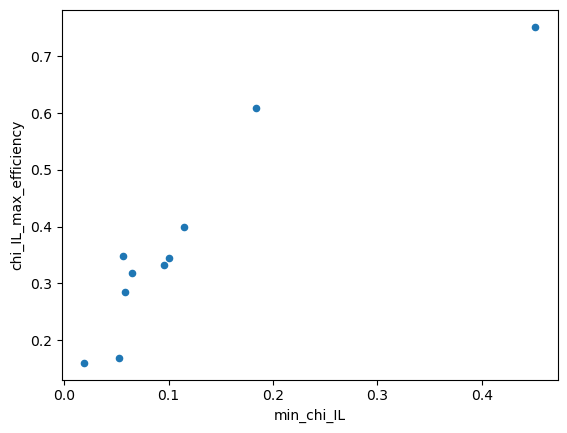

In [120]:
min_chi_IL_chi_IL_max_eff_plot = eff_df.plot.scatter("min_chi_IL", "chi_IL_max_efficiency")

R2 = 0.8305600824319894
y = 1.33x + 0.21


c:\Users\cu19339\AppData\Local\anaconda3\envs\ml-for-chemists-tf2\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


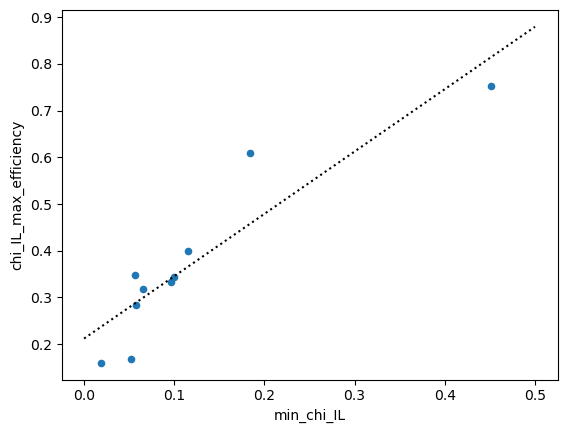

In [121]:
linear_model = LinearRegression(fit_intercept=True)

linear_model.fit(eff_df[["min_chi_IL"]], eff_df[["chi_IL_max_efficiency"]])

xfit = np.linspace(0, 0.5)
yfit = linear_model.predict(xfit[:, np.newaxis])

ax = eff_df.plot.scatter("min_chi_IL", "chi_IL_max_efficiency")
ax.plot(xfit, yfit, linestyle=":", color="black")
score = linear_model.score(eff_df[["min_chi_IL"]], eff_df[["chi_IL_max_efficiency"]])

print(f"R2 = {score}")
equation = "y = {coefficient:.2f}x + {intercept:.2f}"
print(equation.format(coefficient = float(linear_model.coef_[0]), intercept = float(linear_model.intercept_)))

min $\chi_{IL}$ and $\chi_{IL}$ at max efficiency are roughly positively correlated as expected (you would expect the mole fraction of the IL at maximum efficiency to be larger than the minimum mole fraction of IL required to first dissolve cellulose).

The same fit is be done for max_efficiency and chi_IL_max_efficiency:

c:\Users\cu19339\AppData\Local\anaconda3\envs\ml-for-chemists-tf2\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


R2 = 1.0
y = 1.00x + -0.00


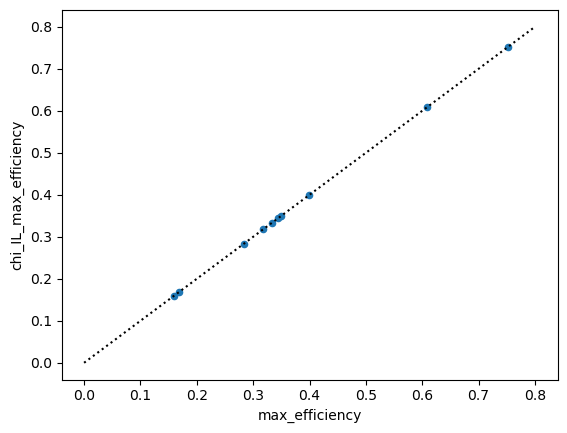

In [122]:
linear_model.fit(eff_df[["max_efficiency"]], eff_df[["chi_IL_max_efficiency"]])
xfit = np.linspace(0, 0.8)
yfit = linear_model.predict(xfit[:, np.newaxis])

ax= eff_df.plot.scatter("max_efficiency", "chi_IL_max_efficiency")
ax.plot(xfit, yfit, linestyle=":", color="black")
score = linear_model.score(eff_df[["max_efficiency"]], eff_df[["chi_IL_max_efficiency"]])

print(f"R2 = {score}")
equation = "y = {coefficient:.2f}x + {intercept:.2f}"
print(equation.format(coefficient = float(linear_model.coef_[0]), intercept = float(linear_model.intercept_)))

Maximum efficiency is directly related to $\chi_{IL}$ - i.e., the maximum efficiency for the dissolution of cellulose is entirely controlled by the mole fraction of the IL in the OES (the CS does not chemically aid in the dissolution).

min_chi_IL and max_efficiency can also be fitted:

c:\Users\cu19339\AppData\Local\anaconda3\envs\ml-for-chemists-tf2\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


R2 = 0.8305600824319894
y = 1.33x + 0.21


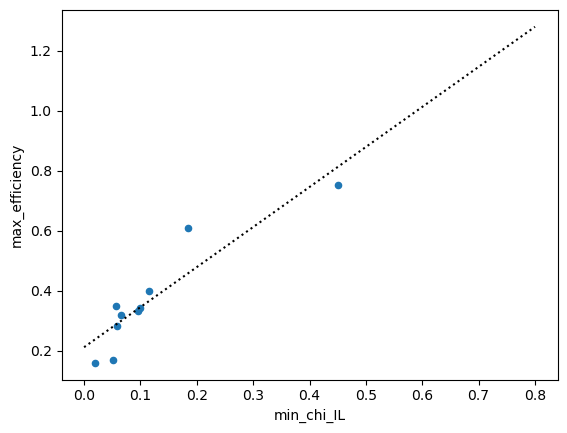

In [123]:
linear_model.fit(eff_df[["min_chi_IL"]], eff_df[["max_efficiency"]])

xfit = np.linspace(0, 0.8)
yfit = linear_model.predict(xfit[:, np.newaxis])

ax = eff_df.plot.scatter("min_chi_IL", "max_efficiency")
ax.plot(xfit, yfit, linestyle=":", color="black")
score = linear_model.score(eff_df[["min_chi_IL"]], eff_df[["max_efficiency"]])

print(f"R2 = {score}")
equation = "y = {coefficient:.2f}x + {intercept:.2f}"
print(equation.format(coefficient = float(linear_model.coef_[0]), intercept = float(linear_model.intercept_)))

Clearly, comparison of the OESs on the basis of mole fraction IL required to effect dissolution of a given quantity of cellulose suggests that some solvents, notably 1-MI, DMSO, DMF, etc., are “good” cosolvents, while others, such as TMU, are significantly less effective. In general, the IL will be the most costly (and sometimes the least green) component of the OES, so we consider a measure of the efficiency of IL use in cellulose dissolution. Differences between the relative efficacies of the solvents are starkly highlighted, with 1-MI yielding the greatest mass of cellulose dissolved per unit mass of IL. DMSO follows a close second, while DMF, DMAc, NMP, sulfolane, and DMI are similar, Table 1. TMU, in spite of its significant structural similarity to DMI, is the poorest solvent tested using the efficiency measure. 

Interestingly, the most efficient IL cosolvent, 1-MI, is not the solvent with the lowest limiting χIL required to effect dissolution of MC. Indeed, there are clues that 1-MI might be distinct from the other solvents as the shape of the curve reflecting quantity of cellulose dissolved versus IL concentration does not match that of all other solvents tested, possibly pointing to some mechanistic peculiarity. 

### 2. Non-linear fitting

It is interesting to consider why some CS are significantly better choices. Looking at the structures of the better performing CSs, they are relatively small molecules (or are cyclic in the case of 1MI - constraining the $CH{_2}$ groups such that they take up less space). Worse perfomring CSs are generally larger and/or are acyclic - occupying more space.

We can hypothesise that the differing behaviour of the OES are related to the volume of the CS.

This can be analysed by importing in molar volume data of each CS:

In [124]:
vol_m = np.array([71.3, 82.4, 107.3, 122.6, 96.44, 76.8, 82.63, 
  95.27, 93.02, 96.2, 85.])
chiIL_min = np.array([0.026125, 0.046998, 0.136876, 
  0.413974, 0.04399, 0.04875, 
  0.05349, 0.0675487, 0.07219, 
  0.13881,0.1341])

data={'molar volume': vol_m, 'minimum chi ionic liquid': chiIL_min}

vol_df = pd.DataFrame(data)
vol_df

,molar volume,minimum chi ionic liquid
0,71.30,0.026125
1,82.40,0.046998
2,107.30,0.136876
3,122.60,0.413974
4,96.44,0.043990
5,76.80,0.048750
6,82.63,0.053490
7,95.27,0.067549
8,93.02,0.072190
9,96.20,0.138810


<AxesSubplot:xlabel='molar volume', ylabel='minimum chi ionic liquid'>

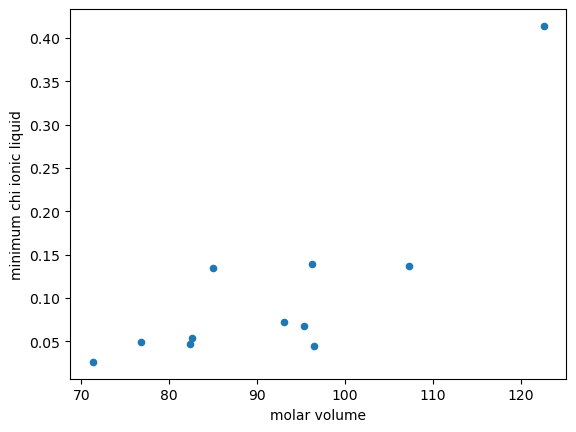

In [125]:
vol_df.plot.scatter("molar volume", "minimum chi ionic liquid")

### Attempting a linear fit:

c:\Users\cu19339\AppData\Local\anaconda3\envs\ml-for-chemists-tf2\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


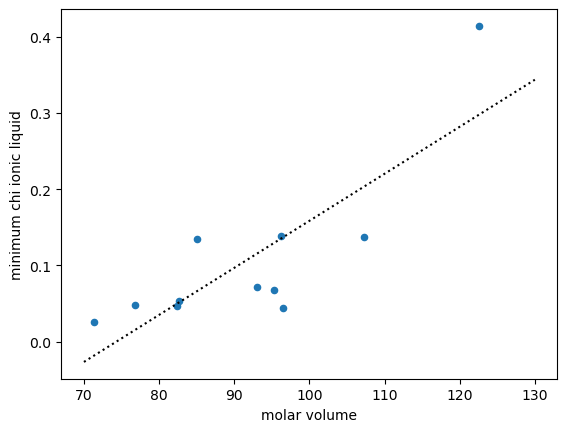

In [126]:
linear_model.fit(vol_df[["molar volume"]], vol_df["minimum chi ionic liquid"])

xfit = np.linspace(70, 130)

yfit = linear_model.predict(xfit[:, np.newaxis])

ax = vol_df.plot.scatter("molar volume", "minimum chi ionic liquid")
ax.plot(xfit, yfit, linestyle=":", color="black")

In [127]:
R2linear = linear_model.score(vol_df[["molar volume"]], vol_df["minimum chi ionic liquid"])
print(f"R2 for the linear fit is: {R2linear}")
equation = "y = {coefficient:.2f}x + {intercept:.2f}"
print(equation.format(coefficient = float(linear_model.coef_[0]), intercept = float(linear_model.intercept_)))

R2 for the linear fit is: 0.667158778296471
y = 0.01x + -0.46


A polynomial fit ($y=mx^{2}+c$) may be better:

c:\Users\cu19339\AppData\Local\anaconda3\envs\ml-for-chemists-tf2\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


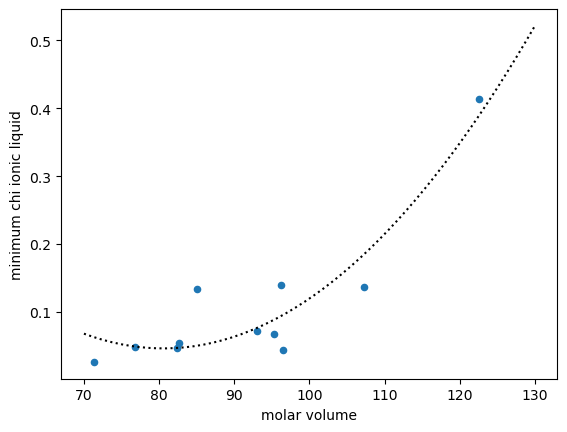

In [128]:
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())

poly_model.fit(vol_df[["molar volume"]],vol_df["minimum chi ionic liquid"])

xfit = np.linspace(70, 130)

yfit = poly_model.predict(xfit[:, np.newaxis])

ax = vol_df.plot.scatter("molar volume", "minimum chi ionic liquid")
ax.plot(xfit, yfit, linestyle=":", color="black")

In [129]:
R2curve = poly_model.score(vol_df[["molar volume"]], vol_df["minimum chi ionic liquid"])
print(f"R2 for the linear fit is: {R2curve}")


R2 for the linear fit is: 0.8626575620820778


The residuals indicate the polynomial fit is better, though it is important to consider overfitting. The paper publishing these results decided to use the polynomial fit since there is sufficient statistical merit to the claim the molar volume of the CS can explain the differences in the efficiency of dissolution. This would mean that the TMU data point should not be disregarded as an outlier, meaning that a polynomial fit is a stronger choice over the linear alternative.

### 3. Multivariate linear regression model

We can devise a simple multivariate linear regression model ($y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 ...  \beta_n X_n
$) to better predict the maximum efficiency of an OES by including more solvent features.

In [130]:
solvent_data = pd.read_csv('./data/TutorialSolventData.csv')
solvent_data

,Primary ID,Name,Mw,BP,Dipole Moment,Density,Molar Volume,(p*)
0,1-methylimidazole,NaN,82.10,198.0,4.12891,1.030,82.400,0.988327
1,dimethylsulfoxide,DMSO,78.13,189.0,3.90000,1.101,71.300,1.000000
2,"n,n-dimethylformamide",DMF,73.09,153.0,3.80000,0.945,82.628,0.880000
3,"1,3-dimethylimidazolidin-2-one",DMI,114.15,225.0,4.25116,1.064,107.300,0.934717
4,"n,n-dimethylacetamide",DMAC,87.12,166.1,3.80000,0.937,93.020,0.850000
5,sulfolane,sulfolane,120.20,287.3,4.70000,1.262,95.270,0.900000
6,gamma-valerolactone,NaN,100.12,208.0,4.71000,1.050,96.200,NaN
7,"1,1,3,3-tetramethylurea",TMU,116.20,175.2,4.00214,0.969,122.600,0.790000
8,n-methylpyrrolidine-2-one,NMP,99.13,202.0,4.10000,1.026,96.440,0.920000


The solvent data is incomplete, so only a subset of the data can be analysed. The DMAc CS data will be left out of the training set to be used to test the model.

In [131]:
solventrange = [0,1,2,3,5,7,8,9]
for i in solventrange:
    print(SolventNameList[i])

1MI
DMSO
DMF
DMI
sulfolane
gval
TMU
NMP


In [132]:
target=[]
for i in solventrange:
    target.append(eff["chi_IL_max_efficiency"][i])

In [133]:
solvent_parameters=pd.DataFrame({'Mw': solvent_data['Mw'], 
                                 'BP': solvent_data['BP'], 
                                'Dipole Moment': solvent_data['Dipole Moment'],
                                'Density': solvent_data['Density'],
                                'Molar Volume': solvent_data['Molar Volume']})
solvent_parameters.keys()

Index(['Mw', 'BP', 'Dipole Moment', 'Density', 'Molar Volume'], dtype='object')

In [134]:
train_solvent_parameters = solvent_parameters.drop(4)
test_solvent_parameters = solvent_parameters.iloc[4]
train_solvent_parameters

,Mw,BP,Dipole Moment,Density,Molar Volume
0,82.10,198.0,4.12891,1.030,82.400
1,78.13,189.0,3.90000,1.101,71.300
2,73.09,153.0,3.80000,0.945,82.628
3,114.15,225.0,4.25116,1.064,107.300
5,120.20,287.3,4.70000,1.262,95.270
6,100.12,208.0,4.71000,1.050,96.200
7,116.20,175.2,4.00214,0.969,122.600
8,99.13,202.0,4.10000,1.026,96.440


In [135]:
test_solvent_parameters

Mw                87.120
BP               166.100
Dipole Moment      3.800
Density            0.937
Molar Volume      93.020
Name: 4, dtype: float64

In [136]:
linear_model.fit(train_solvent_parameters, target)

LinearRegression()

In [137]:
linear_model.score(train_solvent_parameters, target)

0.9691129397648972

In [138]:
linear_model.coef_

array([-0.01168629, -0.00933548,  0.51244489,  3.58949899,  0.02543372])

In [139]:
linear_model.intercept_

-4.903446682524476

In [140]:
test=np.array(test_solvent_parameters).reshape(1,-1)
test

array([[ 87.12 , 166.1  ,   3.8  ,   0.937,  93.02 ]])

In [141]:
pred = linear_model.predict(test)[0]
ground_truth = eff_df.iloc[4]["chi_IL_max_efficiency"]

print("Predicted value: {}".format(pred))
print("Actual value: {}".format(ground_truth))
error = ground_truth-pred
print("Error: {:.2f}, Percentage error: {:.1f}%".format(error, 100*(error/ground_truth)))

Predicted value: 0.20431624103908952
Actual value: 0.349
Error: 0.14, Percentage error: 41.5%


c:\Users\cu19339\AppData\Local\anaconda3\envs\ml-for-chemists-tf2\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


This model is likely overfitting due to the large error observed when tested. Can instead eliminate some features to minimise the error and maintain a relatively large $R^{2}$

In [142]:
solvent_parameters=pd.DataFrame({
    'Mw': solvent_data['Mw'], 
    #'BP': solvent_data['BP'], 
    'Dipole Moment': solvent_data['Dipole Moment'],
    #'Density': solvent_data['Density'],
    'Molar Volume': solvent_data['Molar Volume']
})
solvent_parameters.keys()
train_solvent_parameters = solvent_parameters.drop(4)
test_solvent_parameters = solvent_parameters.iloc[4]
linear_model.fit(train_solvent_parameters, target)
print("R2 on training data: ", linear_model.score(train_solvent_parameters, target))
print("model coefficients: ", linear_model.coef_)
print("model intercept: ", linear_model.intercept_)
test=np.array(test_solvent_parameters).reshape(1,-1)
pred = linear_model.predict(test)[0]
ground_truth = eff_df.iloc[4]["chi_IL_max_efficiency"]

print("Predicted value for test data: {}".format(pred))
print("Actual value for test data: {}".format(ground_truth))
error = ground_truth-pred
print("Test data error: {:.2f}, Percentage error: {:.1f}%".format(error, 100*(error/ground_truth)))

R2 on training data:  0.7890848216701569
model coefficients:  [-0.00845824  0.30176146  0.01716774]
model intercept:  -1.6763574239706367
Predicted value for test data: 0.330397080043054
Actual value for test data: 0.349
Test data error: 0.02, Percentage error: 5.3%


c:\Users\cu19339\AppData\Local\anaconda3\envs\ml-for-chemists-tf2\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Molar volume is most significant ($R^2$ of $0.68$ if this is the only feature).

Best model obtained if Mw, dipole moment and molar volume are the features ($R^2 = 0.79$ with error of $5.3$%).

$\chi_{IL} = -1.676 - 0.0085(Mw) + 0.3018(Dipole) + 0.0172(V_{m})$

### 4. Multi-variate polynomial linear regression model

$y = \beta_0 + \beta_1 X_1 + \beta_2 X_1^2 + \beta_3 X_2 + \beta_4 X_2^2 ...  \beta_n X_n$

In the paper, the equation was found to be of the form:
$$
\chi_{cell} = A \chi_{IL} + B (1 - \chi_{IL}) + C (\chi_{IL})^D (1 - \chi_{IL})^E - F \chi_{IL}^2
$$

Note that the molar fraction of the co-solvent $\chi_{CS}$ is given by $\chi_{CS} =  (1 - \chi_{IL})$ so the constants tell you about the chemistry of the system. 

For simplicity, a simplified version $\chi_{cell} = A \chi_{IL} + B (1 - \chi_{IL}) - F \chi_{IL}^2$ can be fitted. This is performed below for DMAc:

In [143]:
#mole fraction of CS first added to the dataframe for DMAc
cDMAc['chi_CS'] = 1 - cDMAc['chi_IL']
cDMAc

,chi_IL,chi_cell,chi_CS
0,0.157366,0.160968,0.842634
1,0.153160,0.176675,0.846840
2,0.145731,0.162210,0.854269
3,0.256200,0.369303,0.743800
4,0.247400,0.329624,0.752600
5,0.240799,0.340310,0.759201
6,0.361927,0.493177,0.638073
7,0.365171,0.486006,0.634829
8,0.359372,0.479463,0.640628
9,0.499171,0.608025,0.500829


In [144]:
data =pd.DataFrame({
    'A-term': cDMAc['chi_IL'],
    'B-term': cDMAc['chi_CS'],
'F-term': cDMAc['chi_IL']})

R2 = 0.9880838240936387


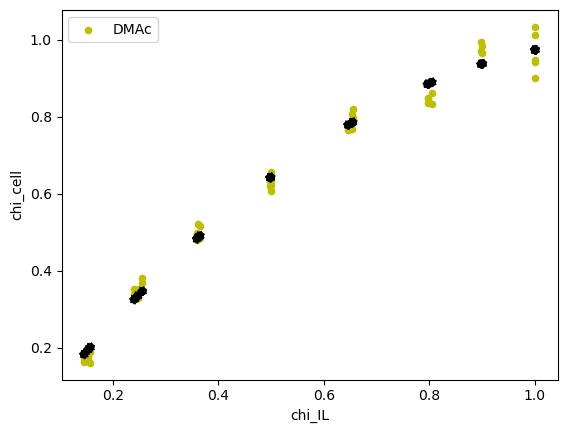

In [145]:
poly_model.fit(data, cDMAc['chi_cell'])

print("R2 = {}".format(poly_model.score(data, cDMAc['chi_cell'])))

yfit = poly_model.predict(data)

ax = cDMAc.plot.scatter("chi_IL","chi_cell", c='y', label='DMAc')
plt.scatter(cDMAc['chi_IL'], yfit, linestyle = ':', color="black")


Most of the variance in the the molar fraction of solvated cellubiose is explained by a linear relationship between volume fraction of IL. This is explained by the figure below: 

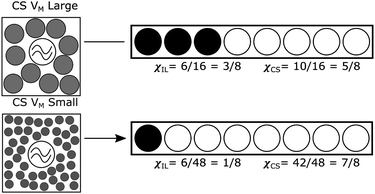

Fig. 6. Let's assume we have a small number of solvation shells of cellubiose in the OES. The IL is in the solvation shell and this takes up a certain volume. Assuming a fixed volume available to the solution, fewer bulky CS are required to fill the remaining volume (10 in this example) than the smaller co-solvent (42). Therefore, for the bulky co-solvent, proportionately the IL accounts for more of the solution by mole, and thus has a larger molar fraction. As the smaller co-solvent requires more co-solvent molecules to fill the volume, the IL is a smaller fraction of the molecules in the solution, so the molar fraction is smaller.

However, in both these cases the volume fraction of the ionic liquid (the fraction of the volume taken up by IL) is the same. So, if we plot the volume fraction on the x-axis, the different between OESs disappears. 

### 5.1 Fitting $\chi_{IL}$ against Vol fraction of IL



In [146]:
for i in range(len(SolventNameList[1:11])):
    my_string =  "vol" + SolventNameList[i] + " = pd.read_csv(\"./data/vols" + SolventNameList[i] + ".csv\")"
    print(my_string)
    exec(my_string)

vol1MI = pd.read_csv("./data/vols1MI.csv")
volDMSO = pd.read_csv("./data/volsDMSO.csv")
volDMF = pd.read_csv("./data/volsDMF.csv")
volDMI = pd.read_csv("./data/volsDMI.csv")
volDMAc = pd.read_csv("./data/volsDMAc.csv")
volsulfolane = pd.read_csv("./data/volssulfolane.csv")
volgbut = pd.read_csv("./data/volsgbut.csv")
volgval = pd.read_csv("./data/volsgval.csv")
volTMU = pd.read_csv("./data/volsTMU.csv")
volNMP = pd.read_csv("./data/volsNMP.csv")


<AxesSubplot:xlabel='vol_frac_IL', ylabel='chi_cell'>

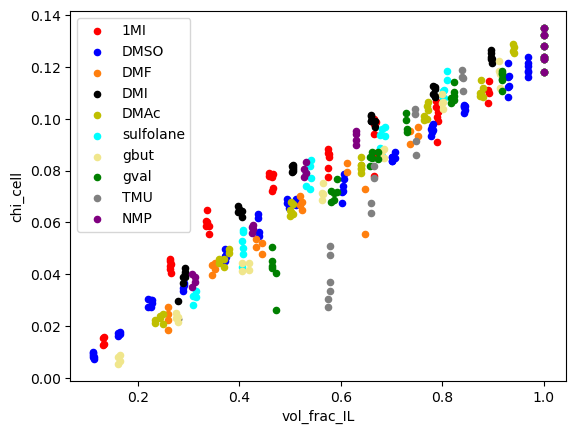

In [147]:
ax=vol1MI.plot.scatter("vol_frac_IL","chi_cell", c='r', label='1MI')
volDMSO.plot.scatter("vol_frac_IL","chi_cell", c='b', ax=ax, label='DMSO')
volDMF.plot.scatter("vol_frac_IL","chi_cell", c='tab:orange', ax=ax, label='DMF')
volDMI.plot.scatter("vol_frac_IL","chi_cell", c='k', ax=ax, label='DMI')
volDMAc.plot.scatter("vol_frac_IL","chi_cell", c='y', ax=ax, label='DMAc')
volsulfolane.plot.scatter("vol_frac_IL","chi_cell", c='cyan', ax=ax, label='sulfolane')
volgbut.plot.scatter("vol_frac_IL","chi_cell", c='khaki', ax=ax, label='gbut')
volgval.plot.scatter("vol_frac_IL","chi_cell", c='g', ax=ax, label='gval')
volTMU.plot.scatter("vol_frac_IL","chi_cell", c='gray', ax=ax, label='TMU')
volNMP.plot.scatter("vol_frac_IL","chi_cell", c='purple', ax=ax, label='NMP')

It seems that plotting the volume fraction has more or less linearized the data. The difference between the co-solvents have more or less dissappeared, which suggests that the co-solvent volume is the main cause of the difference between the datasets, so when we include that by plotting against the volume fraction of ionic liquid (the amount of volume taken up by the IL in one mole of OES at that composition), the different OESs now overlap.

In [148]:
all_data=pd.concat([vol1MI,volDMSO,volDMF,volDMI,volDMAc,volsulfolane,volgbut,volTMU])
print('There are {} datapoints in the combined dataset all_data'.format(len(all_data)))

There are 340 datapoints in the combined dataset all_data


R2 on training data:  0.9319563644363252
model coefficients:  [0.12990517]


c:\Users\cu19339\AppData\Local\anaconda3\envs\ml-for-chemists-tf2\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


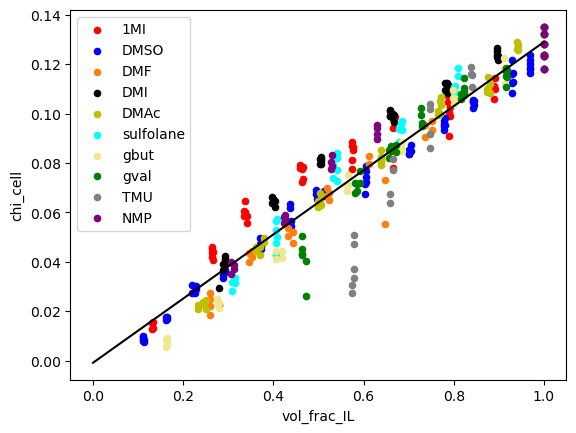

In [149]:
model = LinearRegression(fit_intercept=True)
model.fit(all_data[["vol_frac_IL"]], all_data["chi_cell"])
print("R2 on training data: ", model.score(all_data[["vol_frac_IL"]], all_data["chi_cell"]))
print("model coefficients: ", model.coef_)

# set up x
xfit = np.linspace(0, 1)
# predict y
yfit = model.predict(xfit[:, np.newaxis])


ax=vol1MI.plot.scatter("vol_frac_IL","chi_cell", c='r', label='1MI')
volDMSO.plot.scatter("vol_frac_IL","chi_cell", c='b', ax=ax, label='DMSO')
volDMF.plot.scatter("vol_frac_IL","chi_cell", c='tab:orange', ax=ax, label='DMF')
volDMI.plot.scatter("vol_frac_IL","chi_cell", c='k', ax=ax, label='DMI')
volDMAc.plot.scatter("vol_frac_IL","chi_cell", c='y', ax=ax, label='DMAc')
volsulfolane.plot.scatter("vol_frac_IL","chi_cell", c='cyan', ax=ax, label='sulfolane')
volgbut.plot.scatter("vol_frac_IL","chi_cell", c='khaki', ax=ax, label='gbut')
volgval.plot.scatter("vol_frac_IL","chi_cell", c='g', ax=ax, label='gval')
volTMU.plot.scatter("vol_frac_IL","chi_cell", c='gray', ax=ax, label='TMU')
volNMP.plot.scatter("vol_frac_IL","chi_cell", c='purple', ax=ax, label='NMP')

ax.plot(xfit, yfit, linestyle="-", color="black")

### 5.2 Ridge regression model

In this section, we're going to use DMSO as an example of a typical OES, and 1-MI as an example of an aytpical OES (It is notable that this is the only cosolvent in the group with a nitrogen atom hydrogen bond acceptor). A ridge regression model will be fitted to tune the model for prediction (using L2 linearisation) by introducing a penalty factor into the minimisation of the sum of residuals such that the best fit line becomes more generalised (and hopefully a better predictor of unseen data). This will be compared to a linear regression fit.

<AxesSubplot:xlabel='vol_frac_IL', ylabel='chi_cell'>

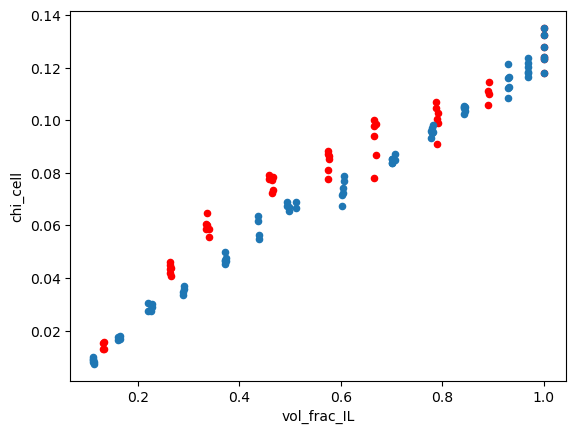

In [150]:
ax=vol1MI.plot.scatter("vol_frac_IL", "chi_cell", c="red")
volDMSO.plot.scatter("vol_frac_IL", "chi_cell",ax=ax)

#### Linear fit:

c:\Users\cu19339\AppData\Local\anaconda3\envs\ml-for-chemists-tf2\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


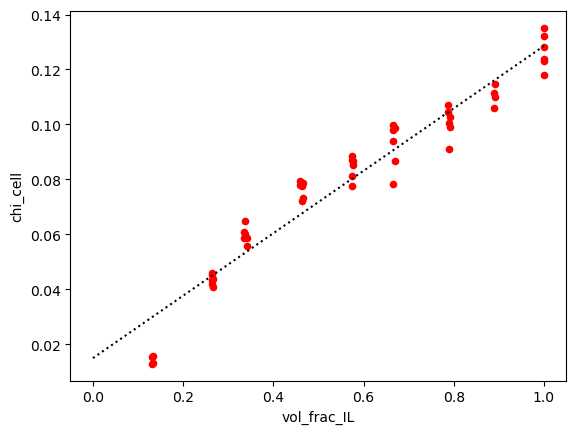

In [151]:
newmodel = LinearRegression(fit_intercept=True)
# set up fit the model to the data
newmodel.fit(vol1MI[["vol_frac_IL"]], vol1MI["chi_cell"])
# set up x
xfitlin = np.linspace(0, 1)
# predict y
yfitlin = newmodel.predict(xfitlin[:, np.newaxis])
R2linear = newmodel.score(vol1MI[["vol_frac_IL"]], vol1MI["chi_cell"])
ax = vol1MI.plot.scatter("vol_frac_IL", "chi_cell", c="red")
ax.plot(xfitlin, yfitlin, linestyle=":", color="black")

In [152]:
print("R2 for the linear fit is: {:.3f}".format(R2linear))

R2 for the linear fit is: 0.938


#### Kernel Ridge Regression:

In [153]:
from sklearn.kernel_ridge import KernelRidge
clf = KernelRidge(alpha=0.50)
clf.fit(vol1MI[["vol_frac_IL"]], vol1MI["chi_cell"]) 
xfitridge = np.linspace(0,1)
yfitridge = clf.predict(xfitridge[:, np.newaxis])

c:\Users\cu19339\AppData\Local\anaconda3\envs\ml-for-chemists-tf2\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KernelRidge was fitted with feature names
  "X does not have valid feature names, but"


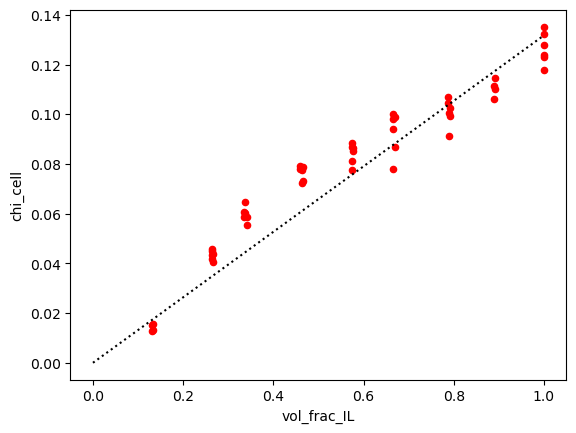

In [154]:
ax = vol1MI.plot.scatter("vol_frac_IL", "chi_cell", c='red')
ax.plot(xfitridge, yfitridge, linestyle=":", color="black")

In [155]:
R2Ridge = clf.score(vol1MI[["vol_frac_IL"]], vol1MI["chi_cell"])
print("R2 for the kernel ridge regression fit is: {:.3f}".format(R2Ridge))
print("R2 for the linear fit is: {:.3f}".format(R2linear))

R2 for the kernel ridge regression fit is: 0.893
R2 for the linear fit is: 0.938


Now we've fitted both models to the atypical data 1-MI, lets see how what those fits would predict for DMSO (remembering that we've now plotted the volume fraction of ionic liquid so there should be no difference between OESs, if the molar volume explains everything about the dataset). The code below plots both fits against the DMSO data. **Important: we've not fitted the lines to this data, this is a prediction from the 1-MI data to the DMSO data**

Black: linear regression; Red: kernel ridge regression


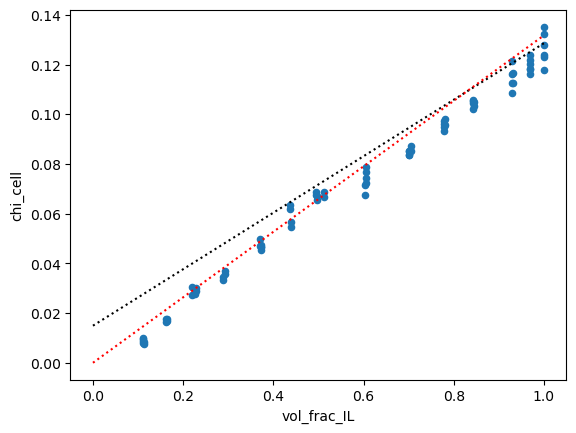

In [156]:
ax = volDMSO.plot.scatter("vol_frac_IL", "chi_cell")
ax.plot(xfitlin, yfitlin, linestyle=":", color="black")
ax.plot(xfitridge, yfitridge, linestyle=":", color="red")
print('Black: linear regression; Red: kernel ridge regression')

In [157]:
print("Co-solvent \tLinear\tRidge")

print("1-MI (fit)     \t{:.2f},\t {:.2f}\t".format(
    newmodel.score(vol1MI[["vol_frac_IL"]], vol1MI["chi_cell"]),
    clf.score(vol1MI[["vol_frac_IL"]], vol1MI["chi_cell"])))

print("DMSO (predict) \t{:.2f},\t {:.2f}\t".format(
    newmodel.score(volDMSO[["vol_frac_IL"]], volDMSO["chi_cell"]),
    clf.score(volDMSO[["vol_frac_IL"]], volDMSO["chi_cell"])))

Co-solvent 	Linear	Ridge
1-MI (fit)     	0.94,	 0.89	
DMSO (predict) 	0.93,	 0.97	


The ridge regression model trained on the atypical co-solvent is more accurately predicting the data for the typical co-solvent (DMSO), illustrating the power of regularisation of models to enhance predictive capabilities.